# Mini Project 5

Welcome to the last Mini Project! In this assignment, you will implement three models including autoencoders (AEs), variational autoencoders (VAEs), and generative adversarial networks (GANs) based on the relevant concepts learned in the class.

---
**Requirements**: 
- Your code should follow [PEP 8](https://www.python.org/dev/peps/pep-0008/) with necessary comments.
- Rename the completed .ipynb file with the following format before submitting it to Canvas.
    - AuE8930_DP_HW5_Last_First.ipynb (with Last and First referring to your last and first name)

## Task 1: Autoencoders vs. Principal Components Analysis
Principal components analysis (PCA) is a common used method for dimensionality reduction. It's an unsupervised technique that reduces the dimensionality of the data by **orthogonally transforming** the data into a set of principal components. The first principal component explains the most amount of the variation in the data in a single component, the second component explains the second most amount of the variation, etc. By choosing the top principal components that explain say 80-90% of the variation, the other components can be dropped since they do not significantly benefit the model.

Autoencoder is another unsupervised technique can be used for dimensionality reduction in which we leverage neural networks for the task of representation learning. Specifically, a **bottleneck** will be imposed in the network which forces a compressed knowledge representation of the original input.

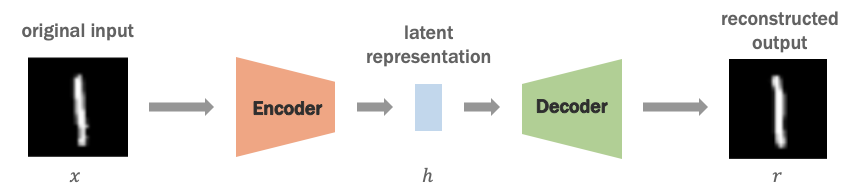


**Tasks**

In this task, you will build two models for dimensionality reduction based on PCA and Autoencoder, respectively. You will use the developed models on the handwritten digits and compare the performance. **The reduced dimension should be two so that the visualization is convenient.**

1. Load [MNIST](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/mnist/load_data) dataset and prepross the dataset.
2. Design a PCA model for dimensionality reduction. Please check [here](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) for more information.
3. Implement a Autoencoder based on TensorFlow 2.x.
4. Compare the reconstruction losses (MSE) of PCA and Autoencoder on the test data.
5. Visualize the reduced results of PCA and Autoencoder.
6. Analysis the pros and cons of each model.

## Task 1.1 : Loading and Preprocessing the data

In [7]:
#Library import
import numpy as np
import pandas as pd
from tensorflow.keras.utils import to_categorical
from sklearn.decomposition import PCA
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
from datetime import datetime


## Task 1.2 : PCA Model

In [14]:
(x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data(path='mnist.npz')
print(x_train.shape)
print(x_test.shape)

x_train_pp=x_train.reshape(x_train.shape[0],x_train.shape[1]*x_train.shape[2])
print(x_train_pp.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000, 784)


In [22]:
# 1.2 code
from sklearn.decomposition import PCA

pca = PCA(0.95)
pca.fit(x_train_pp)
print(pca.n_components_)

x_train_pca = pca.transform(x_train_pp)


154


In [23]:
print(x_train_pca.shape)

(60000, 154)


In [24]:
x_projected = pca.inverse_transform(x_train_pca)

In [25]:
loss = ((x_train_pp - x_projected) ** 2).mean()

In [26]:
print(loss)

217.79366111265458


In [27]:
x_reconstructed=x_projected.reshape(x_projected.shape[0],28,28)

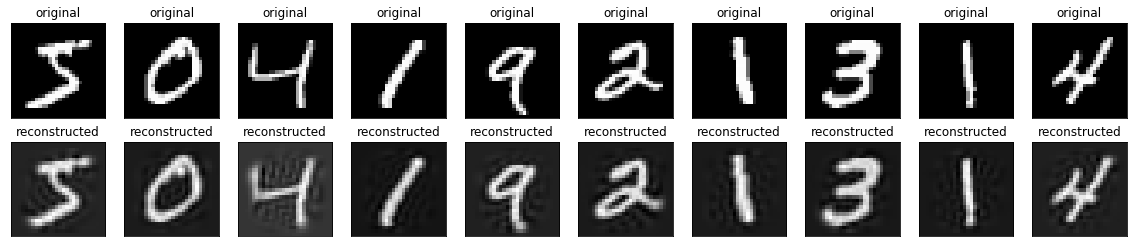

In [28]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_train[i])
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(x_reconstructed[i])
  plt.title("reconstructed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

## Task 1.3 : Auto Encoder Model

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

In [2]:
(x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data(
    path='mnist.npz'
)

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print (x_train.shape)
print (x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [3]:
latent_dim = 64 

class Autoencoder(Model):
  def __init__(self, latent_dim):
    super(Autoencoder, self).__init__()
    self.latent_dim = latent_dim   
    self.encoder = tf.keras.Sequential([
      layers.Flatten(),
      layers.Dense(latent_dim, activation='relu'),
    ])
    self.decoder = tf.keras.Sequential([
      layers.Dense(784, activation='sigmoid'),
      layers.Reshape((28, 28))
    ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = Autoencoder(latent_dim)



In [4]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())


autoencoder.fit(x_train, x_train,
                epochs=10,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.0439 - val_loss: 0.0092
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0079 - val_loss: 0.0053
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0052 - val_loss: 0.0046
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0046 - val_loss: 0.0042
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0044 - val_loss: 0.0042
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0042 - val_loss: 0.0041
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0042 - val_loss: 0.0040
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0041 - val_loss: 0.0040
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0040 - val_loss: 0.0039
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.004

In [5]:
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

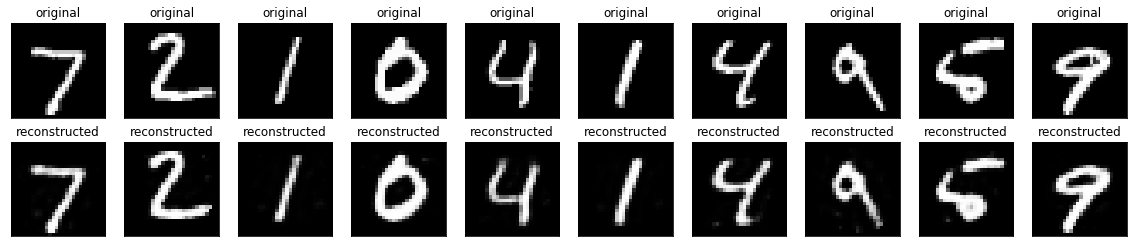

In [6]:

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test[i])
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs[i])
  plt.title("reconstructed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

## Task 1.4 : MSE Comparison

In [59]:
# 1.4 code

## Task 1.5 : Visualization of Reduced Results

In [60]:
# 1.5 code

## Task 1.6 : Pros and Cons of Each model

In [61]:
# 1.6 code

## Task 2: Variational Autoencoders
VAE is a generative model that could be used to generate complex datasets such as images of fictional celebrity faces and high-resolution digital artwork. In this task, your goal is to build a VAE model to create high-quality images of faces.

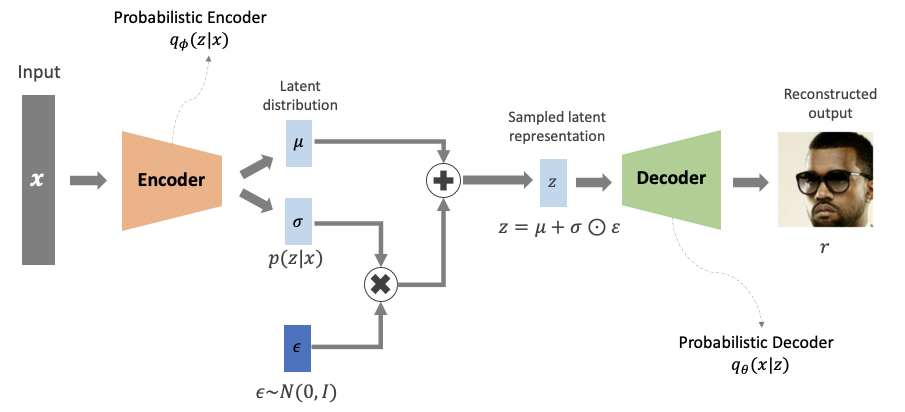

**Dataset**

CelebFaces Attributes Dataset ([CelebA](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html)) is a large-scale face attributes dataset with more than 200K celebrity images, each with 40 attribute annotations. The images in this dataset cover large pose variations and background clutter.

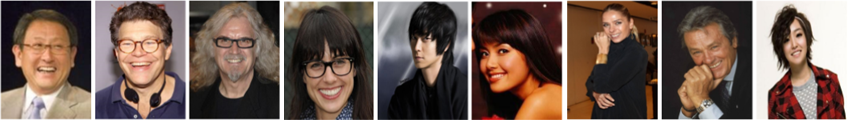

**Tasks**

1. Download CelebFaces Attributes ([CelebA](https://www.kaggle.com/jessicali9530/celeba-dataset)) dataset  as your training data.
2. Load and prepross the dataset.
    - You should center crop the images so that each one will be 128x128 since the shape of each original image is 218x178. Please check [image_dataset_from_directory](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image_dataset_from_directory) and [CenterCrop](https://www.tensorflow.org/api_docs/python/tf/keras/layers/experimental/preprocessing/CenterCrop) for details.
3. Build a VAE model based on TensorFlow 2.x and plot out the model. Check [here](https://www.tensorflow.org/tutorials/generative/cvae) for more information.
4. Train your model and visualize the training history including the total loss, reconstruction loss, and KL loss.
5. Display several generated images.

## Data Import and Preprocess


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [44]:
import pathlib
data_dir=pathlib.Path.cwd()/'archive/img_align_celeba'
print(data_dir)

C:\Users\ameya\Downloads\archive\img_align_celeba


In [45]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

202599


In [98]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(218, 178))


Found 202599 files belonging to 1 classes.
Using 162080 files for training.


In [99]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(218, 178))

Found 202599 files belonging to 1 classes.
Using 40519 files for validation.


In [100]:
layer=tf.keras.layers.experimental.preprocessing.CenterCrop(
    128, 128, name=None)

In [106]:
train_ds=layer.adapt(train_ds)
test_ds=layer.adapt(test_ds)

In [108]:
import tensorflow_datasets as tfds

train_examples = tfds.as_numpy(train_ds)
test_examples = tfds.as_numpy(test_ds)

TypeError: Arguments to as_numpy must be tf.Tensors or tf.data.Datasets. Got: <class 'NoneType'>.

In [103]:
print(type(train_examples))

<class 'tensorflow_datasets.core.dataset_utils._IterableDataset'>


In [67]:
pip install tensorflow-probability


  Using cached tensorflow_probability-0.12.2-py2.py3-none-any.whl (4.8 MB)
  Using cached dm_tree-0.1.6-cp37-cp37m-win_amd64.whl (75 kB)
Note: you may need to restart the kernel to use updated packages.


In [68]:
from IPython import display

import glob
import imageio
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
import tensorflow_probability as tfp
import time

In [75]:
class Sampling(layers.Layer):
    """Uses (z_mean, z_log_var) to sample z, the vector encoding a digit."""

    def call(self, inputs):
        z_mean, z_log_var = inputs
        batch = tf.shape(z_mean)[0]
        dim = tf.shape(z_mean)[1]
        epsilon = tf.keras.backend.random_normal(shape=(batch, dim))
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon

In [82]:
latent_dim = 128

encoder_inputs = keras.Input(shape=(128, 128, 1))
x = layers.Conv2D(32, 3, activation="relu", strides=2, padding="same")(encoder_inputs)
x = layers.Conv2D(64, 3, activation="relu", strides=2, padding="same")(x)
x = layers.Flatten()(x)
x = layers.Dense(16, activation="relu")(x)
z_mean = layers.Dense(latent_dim, name="z_mean")(x)
z_log_var = layers.Dense(latent_dim, name="z_log_var")(x)
z = Sampling()([z_mean, z_log_var])
encoder = keras.Model(encoder_inputs, [z_mean, z_log_var, z], name="encoder")
encoder.summary()

Model: "encoder"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            [(None, 128, 128, 1) 0                                            
__________________________________________________________________________________________________
conv2d_6 (Conv2D)               (None, 64, 64, 32)   320         input_9[0][0]                    
__________________________________________________________________________________________________
conv2d_7 (Conv2D)               (None, 32, 32, 64)   18496       conv2d_6[0][0]                   
__________________________________________________________________________________________________
flatten_3 (Flatten)             (None, 65536)        0           conv2d_7[0][0]                   
____________________________________________________________________________________________

In [87]:
latent_inputs = keras.Input(shape=(latent_dim,))
x = layers.Dense(16 * 16 * 64, activation="relu")(latent_inputs)
x = layers.Reshape((16, 16, 64))(x)
x = layers.Conv2DTranspose(64, 3, activation="relu", strides=4, padding="same")(x)
x = layers.Conv2DTranspose(28, 3, activation="relu", strides=2, padding="same")(x)
decoder_outputs = layers.Conv2DTranspose(1, 3, activation="sigmoid", padding="same")(x)
decoder = keras.Model(latent_inputs, decoder_outputs, name="decoder")
decoder.summary()

Model: "decoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_14 (InputLayer)        [(None, 128)]             0         
_________________________________________________________________
dense_13 (Dense)             (None, 16384)             2113536   
_________________________________________________________________
reshape_9 (Reshape)          (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_transpose_28 (Conv2DT (None, 64, 64, 64)        36928     
_________________________________________________________________
conv2d_transpose_29 (Conv2DT (None, 128, 128, 28)      16156     
_________________________________________________________________
conv2d_transpose_30 (Conv2DT (None, 128, 128, 1)       253       
Total params: 2,166,873
Trainable params: 2,166,873
Non-trainable params: 0
_________________________________________________

In [88]:
class VAE(keras.Model):
    def __init__(self, encoder, decoder, **kwargs):
        super(VAE, self).__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder
        self.total_loss_tracker = keras.metrics.Mean(name="total_loss")
        self.reconstruction_loss_tracker = keras.metrics.Mean(
            name="reconstruction_loss"
        )
        self.kl_loss_tracker = keras.metrics.Mean(name="kl_loss")

    @property
    def metrics(self):
        return [
            self.total_loss_tracker,
            self.reconstruction_loss_tracker,
            self.kl_loss_tracker,
        ]

    def train_step(self, data):
        with tf.GradientTape() as tape:
            z_mean, z_log_var, z = self.encoder(data)
            reconstruction = self.decoder(z)
            reconstruction_loss = tf.reduce_mean(
                tf.reduce_sum(
                    keras.losses.binary_crossentropy(data, reconstruction), axis=(1, 2)
                )
            )
            kl_loss = -0.5 * (1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var))
            kl_loss = tf.reduce_mean(tf.reduce_sum(kl_loss, axis=1))
            total_loss = reconstruction_loss + kl_loss
        grads = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        self.total_loss_tracker.update_state(total_loss)
        self.reconstruction_loss_tracker.update_state(reconstruction_loss)
        self.kl_loss_tracker.update_state(kl_loss)
        return {
            "loss": self.total_loss_tracker.result(),
            "reconstruction_loss": self.reconstruction_loss_tracker.result(),
            "kl_loss": self.kl_loss_tracker.result(),
        }

In [107]:
vae = VAE(encoder, decoder)
vae.compile(optimizer=keras.optimizers.Adam())
vae.fit(train_ds, epochs=30, batch_size=128)

ValueError: Failed to find data adapter that can handle input: <class 'NoneType'>, <class 'NoneType'>

In [73]:
# Pick a sample of the test set for generating output images
assert batch_size >= num_examples_to_generate
for test_batch in test_dataset.take(1):
  test_sample = test_batch[0:num_examples_to_generate, :, :, :]

TypeError: tuple indices must be integers or slices, not tuple

In [ ]:
generate_and_save_images(model, 0, test_sample)

for epoch in range(1, epochs + 1):
  start_time = time.time()
  for train_x in train_dataset:
    train_step(model, train_x, optimizer)
  end_time = time.time()

  loss = tf.keras.metrics.Mean()
  for test_x in test_dataset:
    loss(compute_loss(model, test_x))
  elbo = -loss.result()
  display.clear_output(wait=False)
  print('Epoch: {}, Test set ELBO: {}, time elapse for current epoch: {}'
        .format(epoch, elbo, end_time - start_time))
  generate_and_save_images(model, epoch, test_sample)

In [ ]:
def display_image(epoch_no):
  return PIL.Image.open('image_at_epoch_{:04d}.png'.format(epoch_no))

In [ ]:
plt.imshow(display_image(epoch))
plt.axis('off')  # Display images

## Task 3: Generative Adversarial Networks
A generative adversarial network (GAN) is a class of machine learning frameworks designed by Ian Goodfellow and his colleagues in 2014. Two neural networks contest with each other in a game (in the form of a zero-sum game, where one agent's gain is another agent's loss). In this task, you need to create a GAN to generate specific class of figures for given condition (class). For example, give a label "3" (which represents Dress), you will use your network to generate a figure of Dress.

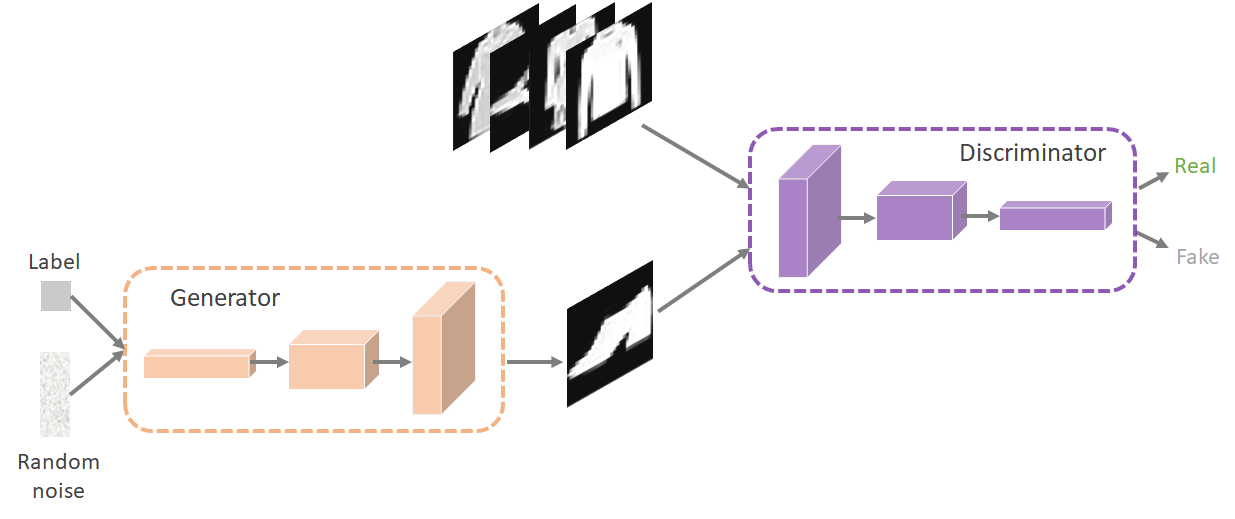



**Dataset**

[Fashion-MNIST](https://research.zalando.com/welcome/mission/research-projects/fashion-mnist/) is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.

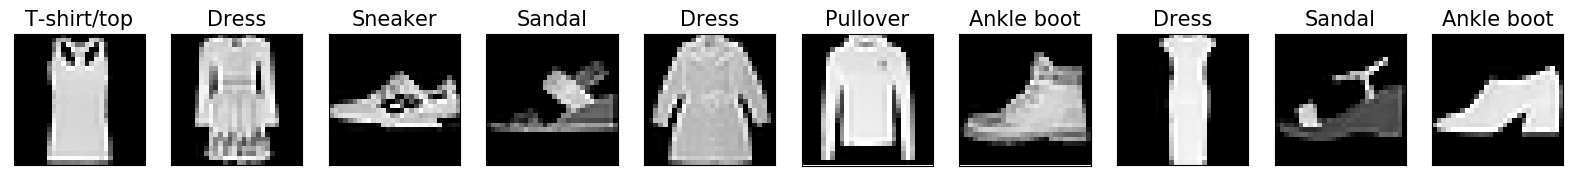

**Tasks**

1. Download the Fashion-Mnist dataset from Canvas and look into the data.
    - The Fashion-Mnist dataset has 60000 training data. Each image is a 28x28 grayscale image, associated with a label from 10 classes. 
2. Load and prepross the dataset.
3. Build a GAN model based on TensorFlow 2.x and plot out the model.
4. Train your model and visualize the training history including the loss of Generator and Discriminator.
5. Plot the intermidiate results through the training procedure. eg.: After each 20 epochs in training plot a grid of generated results. (check this [resource](https://www.tensorflow.org/tutorials/generative/dcgan) to figure out how to save the model and generate the intermediate results during the training)
6. Display final generated results for each of ten classes and discuss your results.

In [3]:
# TODO: write your code here
import numpy as np
import pandas as pd 

In [8]:
import os
for dirname, _, filenames in os.walk('./GAN_HW/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./GAN_HW/input\fashion-mnist_train.csv


In [18]:
import matplotlib.pyplot as plt
from keras import preprocessing
#from keras.models import Sequential
#from keras.layers import Conv2D,Dropout,Dense,Flatten,Conv2DTranspose,BatchNormalization,LeakyReLU,Reshape
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,Dropout,Dense,Flatten,Conv2DTranspose,BatchNormalization,LeakyReLU,Reshape

import tensorflow as tf

In [9]:
train_data = pd.read_csv('./GAN_HW/input/fashion-mnist_train.csv')
train_data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
X_train = train_data.drop('label',axis=1)
X_train.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,5,0,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,1,2,0,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
X_train=X_train.values
print(X_train.shape)

(60000, 784)


In [12]:
X_train=X_train.reshape(-1,28,28,1)
print(X_train.shape)

(60000, 28, 28, 1)


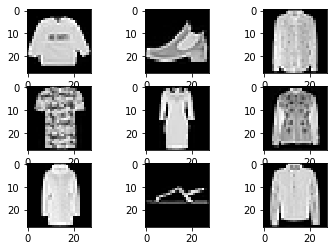

In [14]:
fig,axe=plt.subplots(3,3)
idx = 0
for i in range(3):
    for j in range(3):
        axe[i,j].imshow(X_train[idx].reshape(28,28),cmap='gray')
        idx+=1

In [15]:
X_train =  X_train.astype('float32')
X_train = X_train/255
X_train = X_train*2 - 1.

In [19]:

generator = Sequential()
generator.add(Dense(512,input_shape=[100]))
generator.add(LeakyReLU(alpha=0.2))
generator.add(BatchNormalization(momentum=0.8))
generator.add(Dense(256))
generator.add(LeakyReLU(alpha=0.2))
generator.add(BatchNormalization(momentum=0.8))
generator.add(Dense(128))
generator.add(LeakyReLU(alpha=0.2))
generator.add(BatchNormalization(momentum=0.8))
generator.add(Dense(784))
generator.add(Reshape([28,28,1]))

In [20]:
generator.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               51712     
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 512)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 512)               2048      
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 256)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
dense_3 (Dense)              (None, 128)              

In [21]:
discriminator = Sequential()
discriminator.add(Dense(1,input_shape=[28,28,1]))
discriminator.add(Flatten())
discriminator.add(Dense(256))
discriminator.add(LeakyReLU(alpha=0.2))
discriminator.add(Dropout(0.5))
discriminator.add(Dense(128))
discriminator.add(LeakyReLU(alpha=0.2))
discriminator.add(Dropout(0.5))
discriminator.add(Dense(64))
discriminator.add(LeakyReLU(alpha=0.2))
discriminator.add(Dropout(0.5))
discriminator.add(Dense(1,activation='sigmoid'))

In [22]:
discriminator.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 28, 28, 1)         2         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               200960    
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 256)               0         
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               32896     
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 128)              

In [23]:
GAN =Sequential([generator,discriminator])
discriminator.compile(optimizer='adam',loss='binary_crossentropy')
discriminator.trainable = False

In [24]:
GAN.compile(optimizer='adam',loss='binary_crossentropy')

In [25]:
GAN.layers

In [26]:
GAN.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_1 (Sequential)    (None, 28, 28, 1)         320656    
_________________________________________________________________
sequential_2 (Sequential)    (None, 1)                 242179    
Total params: 562,835
Trainable params: 318,864
Non-trainable params: 243,971
_________________________________________________________________


In [27]:
epochs = 50
batch_size = 100
noise_shape=100

Currently on Epoch 1


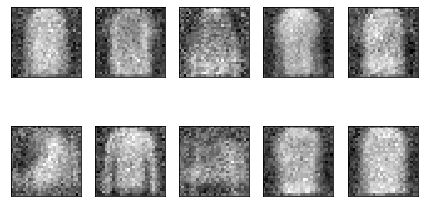

Currently on Epoch 2
Currently on Epoch 3
Currently on Epoch 4
Currently on Epoch 5
Currently on Epoch 6
Currently on Epoch 7
Currently on Epoch 8
Currently on Epoch 9
Currently on Epoch 10
Currently on Epoch 11


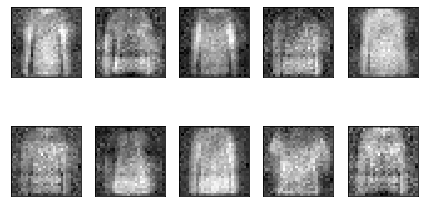

Currently on Epoch 12
Currently on Epoch 13
Currently on Epoch 14
Currently on Epoch 15
Currently on Epoch 16
Currently on Epoch 17
Currently on Epoch 18
Currently on Epoch 19
Currently on Epoch 20
Currently on Epoch 21


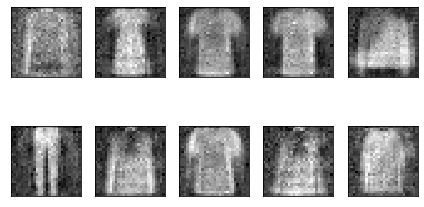

Currently on Epoch 22
Currently on Epoch 23
Currently on Epoch 24
Currently on Epoch 25
Currently on Epoch 26
Currently on Epoch 27
Currently on Epoch 28
Currently on Epoch 29
Currently on Epoch 30
Currently on Epoch 31


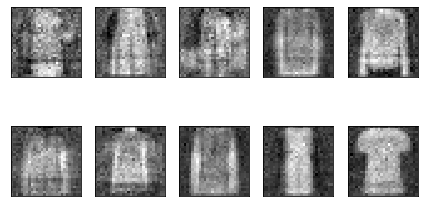

Currently on Epoch 32
Currently on Epoch 33
Currently on Epoch 34
Currently on Epoch 35
Currently on Epoch 36
Currently on Epoch 37
Currently on Epoch 38
Currently on Epoch 39
Currently on Epoch 40
Currently on Epoch 41


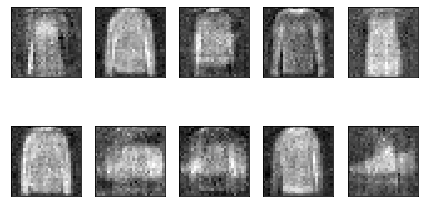

Currently on Epoch 42
Currently on Epoch 43
Currently on Epoch 44
Currently on Epoch 45
Currently on Epoch 46
Currently on Epoch 47
Currently on Epoch 48
Currently on Epoch 49
Currently on Epoch 50
Training is complete


In [29]:
with tf.device('/cpu:0'):
 for epoch in range(epochs):
    print(f"Currently on Epoch {epoch+1}")
    
    
    for i in range(X_train.shape[0]//batch_size):
            
        noise=np.random.normal(size=[batch_size,noise_shape])
       
        gen_image = generator.predict_on_batch(noise)
        
        train_dataset = X_train[i*batch_size:(i+1)*batch_size]
       
        #training discriminator on real images
        train_label=np.ones(shape=(batch_size,1))
        discriminator.trainable = True
        d_loss_real=discriminator.train_on_batch(train_dataset,train_label)
        
        #training discriminator on fake images
        train_label=np.zeros(shape=(batch_size,1))
        d_loss_fake=discriminator.train_on_batch(gen_image,train_label)
        
        
        #training generator 
        noise=np.random.normal(size=[batch_size,noise_shape])
        train_label=np.ones(shape=(batch_size,1))
        discriminator.trainable = False
        
        d_g_loss_batch =GAN.train_on_batch(noise, train_label)
        
        
        
       
    #plotting generated images at the start and then after every 10 epoch
    if epoch % 10 == 0:
        samples = 10
        x_fake = generator.predict(np.random.normal(loc=0, scale=1, size=(samples, 100)))

        for k in range(samples):
            plt.subplot(2, 5, k+1)
            plt.imshow(x_fake[k].reshape(28, 28), cmap='gray')
            plt.xticks([])
            plt.yticks([])

        plt.tight_layout()
        plt.show()

        
        
print('Training is complete')

In [33]:
GAN.save("GAN_model.h5")
generator.save("generator_model.h5")

In [30]:
noise=np.random.normal(size=[10,noise_shape])

gen_image = generator.predict(noise)

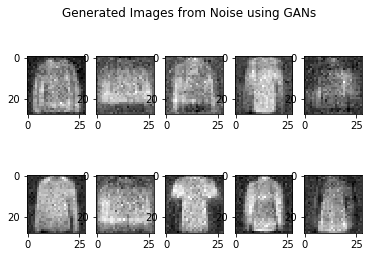

In [31]:
fig,axe=plt.subplots(2,5)
fig.suptitle('Generated Images from Noise using GANs')
idx=0
for i in range(2):
    for j in range(5):
         axe[i,j].imshow(gen_image[idx].reshape(28,28),cmap='gray')
         idx+=1